<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title"><b>Modeling Linear Regression by ILP</b></span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://mate.unipv.it/gualandi" property="cc:attributionName" rel="cc:attributionURL">Stefano Gualandi</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>. Based on a project at <a xmlns:dct="http://purl.org/dc/terms/" href="https://github.com/mathcoding/opt4ds" rel="dct:source">https://github.com/mathcoding/opt4ds</a>.

# Linear Regression by Integer Linear Programming
In this notebook, we show how to find a LP model to perform linear regression. This is intended to be a modeling exercise from an optimization persepctive.

The basic example is freely inspired from Chapter 1 of [Deep Learning, Foundations and Concepts](https://link.springer.com/book/10.1007/978-3-031-45468-4) by [C.M. Bishop](https://scholar.google.co.uk/citations?user=gsr-K3ADUvAC&hl=en&oi=ao) and [H. Bishop](https://www.linkedin.com/in/hugh-bishop-119075154).

### 3.1 Fitting $sin(x)$ plus white noise
We start by generating a synthetic dataset for didactic objectives.

In [1]:
import numpy as np
from math import pi
from numpy.random import uniform, normal

# Number of sample points
N = 25
# Samples with white noise
As = uniform(0, 2*pi, N)
Bs = np.sin(As) + normal(0, 0.1, N)

In [ ]:
print(As)
print(Bs)

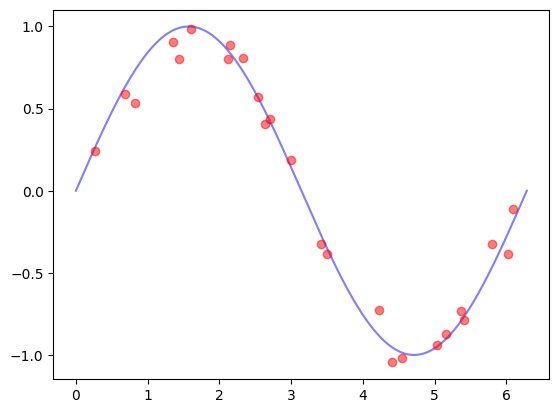

In [2]:
from matplotlib import pyplot as plt
# Plot True sin function
D = np.linspace(0, 2*pi, 1000)
plt.plot(D, np.sin(D), color='blue', alpha=0.5)
# Plot sample points
plt.plot(As, Bs, 'o', color='red', alpha=0.5)

**PROBLEM:** How to model via ILP the problem of fitting a polynomial to the sample point $(a_i, b_i)$?

$$
    \hat{b}_i = f_x(a_i) = \sum_{j=0}^{n} x_j a_i^j = x_0 + x_1 a_i^1 + ... + x_j a_i^j + ... + x_n a^n 
$$